<a href="https://colab.research.google.com/github/alicex2020/Mandarin-Tone-Classification/blob/master/Mandarin_Tone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the most useful packages
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd

f


In [5]:
!ls ../data/ma_data

ma1_FV1_MP3.mp3  ma3_FV1_MP3.mp3  ma_encodings.csv
ma2_FV1_MP3.mp3  ma4_FV1_MP3.mp3


# **Different Sound Representations for Sample Files**

In [6]:
# Get audio
file1 = '../data/ma_data/ma1_FV1_MP3.mp3'
audio1, sample_rate1 = librosa.core.load(file1)
file2 = '../data/ma_data/ma2_FV1_MP3.mp3'
audio2, sample_rate2 = librosa.core.load(file2)
file3 = '../data/ma_data/ma3_FV1_MP3.mp3'
audio3, sample_rate3 = librosa.core.load(file3)
file4 = '../data/ma_data/ma4_FV1_MP3.mp3'
audio4, sample_rate4 = librosa.core.load(file4)



/Users/nicholas.rossi/miniconda3/envs/tinghaole/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/nicholas.rossi/miniconda3/envs/tinghaole/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/nicholas.rossi/miniconda3/envs/tinghaole/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/Users/nicholas.rossi/miniconda3/envs/tinghaole/lib/python3.6/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(1025, 33)


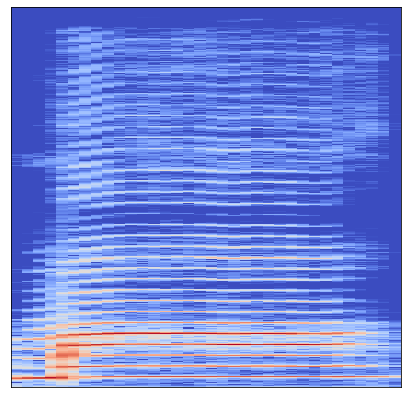

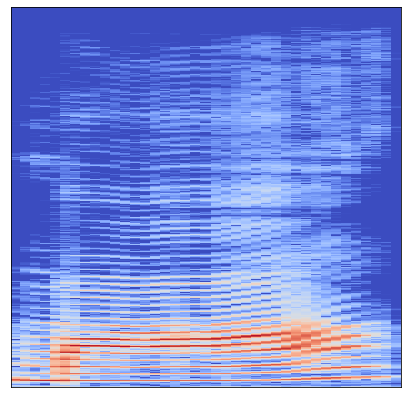

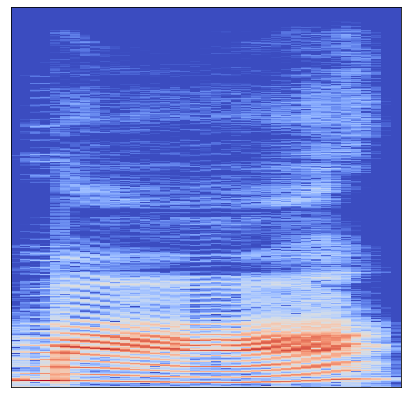

<Figure size 504x504 with 0 Axes>

In [7]:
# spectrograms
X = librosa.stft(audio1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(7, 7))
librosa.display.specshow(Xdb)

X2 = librosa.stft(audio2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb2)

X3 = librosa.stft(audio3)
Xdb3 = librosa.amplitude_to_db(abs(X3))
plt.figure(figsize=(7,7))
librosa.display.specshow(Xdb3)

X4 = librosa.stft(audio4)
Xdb4 = librosa.amplitude_to_db(abs(X4))
plt.figure(figsize=(7,7))
print(Xdb4.shape)
# librosa.display.specshow(Xdb4)

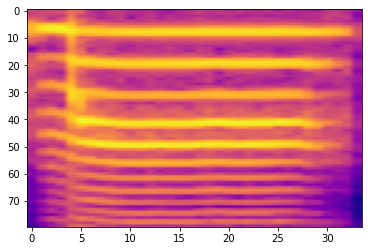

(80, 34)


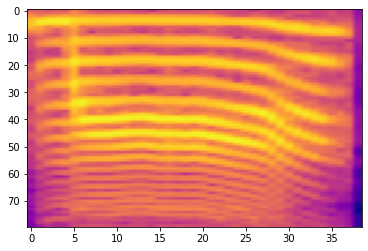

(80, 39)


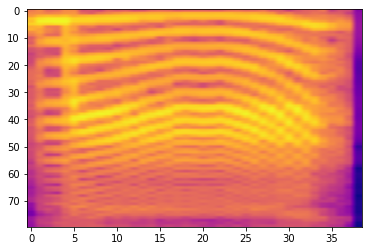

(80, 39)


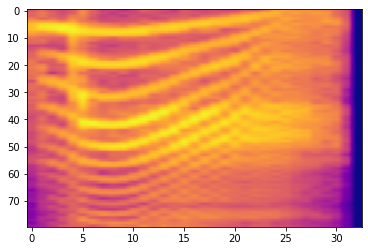

(80, 33)


In [8]:
# mel-spectrograms
import matplotlib.cm as cm

mel1 = librosa.feature.melspectrogram(audio1, sr=sample_rate1, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel1 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel1.shape)

mel2 = librosa.feature.melspectrogram(audio2, sr=sample_rate2, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel2 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel2.shape)

mel3 = librosa.feature.melspectrogram(audio3, sr=sample_rate3, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel3 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel3.shape)

mel4 = librosa.feature.melspectrogram(
    audio4, sr=sample_rate4, n_fft=1024, hop_length=512, n_mels=80, fmin=75, fmax=3700)
plt.imshow(np.log10(mel4 + 1e-10), aspect='auto', cmap=cm.plasma)
plt.show()
print(mel4.shape)

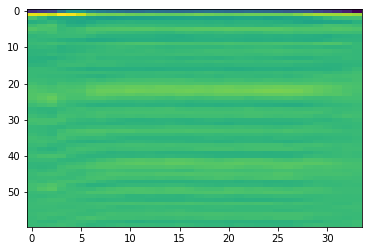

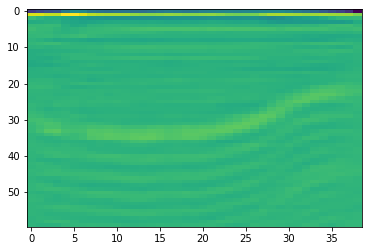

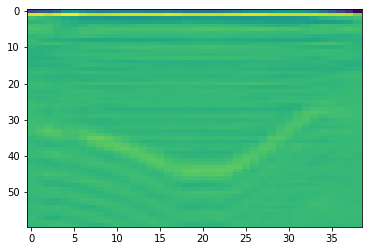

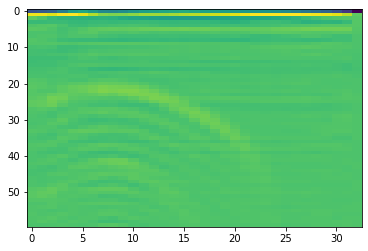

(60, 33)


In [9]:
# MFCC

mfcc = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio2, sr=sample_rate2, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio3, sr=sample_rate3, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()

mfcc = librosa.feature.mfcc(y=audio4, sr=sample_rate4, n_mfcc=60)
plt.imshow(mfcc, aspect='auto', cmap=cm.viridis)
plt.show()
print(mfcc.shape)

def mp3tomfcc(file_path, max_pad):
  audio, sample_rate = librosa.core.load(file_path)
  mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=60)
  pad_width = max_pad - mfcc.shape[1]
  mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
  return mfcc
  

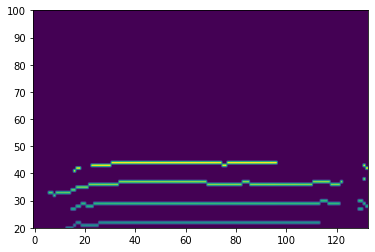

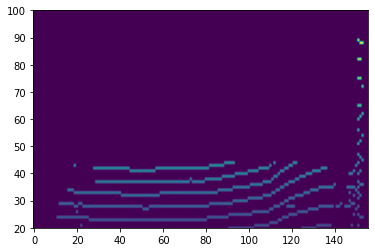

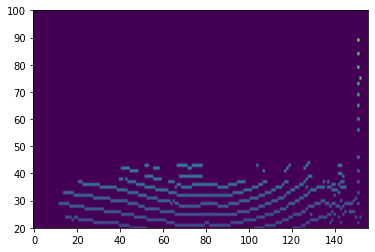

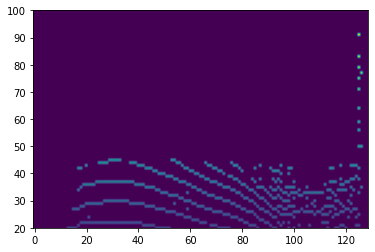

In [10]:
# Pitch

pitch, mag = librosa.core.piptrack(audio1, sr=sample_rate1, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(audio2[0:sample_rate2*2], sr=sample_rate2, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(audio3[0:sample_rate3*2], sr=sample_rate3, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

pitch, mag = librosa.core.piptrack(audio4[0:sample_rate4*2], sr=sample_rate4, n_fft=512)
plt.imshow(pitch, aspect='auto')
plt.ylim([20,100])
plt.show()

# Deep Learning on Full Tone Perfect Dataset

In [0]:
# Compile MFCCs and extract labels: https://github.com/adhishthite/sound-mnist/blob/master/utils/wav2mfcc.py

file_path1 = '/content/drive/My Drive/IW06/AliceProject/Complete_Data/FV1'
file_path2 = '/content/drive/My Drive/IW06/AliceProject/Complete_Data/FV2'
file_path3 = '/content/drive/My Drive/IW06/AliceProject/Complete_Data/FV3'
file_path4 = '/content/drive/My Drive/IW06/AliceProject/Complete_Data/MV1'
file_path5 = '/content/drive/My Drive/IW06/AliceProject/Complete_Data/MV2'
file_path6 = '/content/drive/My Drive/IW06/AliceProject/Complete_Data/MV3'

mfccs=[]
for f in os.listdir(file_path1):
  if f.endswith('.mp3'):
    mfccs.append(mp3tomfcc(file_path1 + '/' + f, 60)) 

    
for f in os.listdir(file_path2):
  if f.endswith('.mp3'):
    mfccs.append(mp3tomfcc(file_path2 + '/' + f, 60))

for f in os.listdir(file_path3):
  if f.endswith('.mp3'):
    mfccs.append(mp3tomfcc(file_path3 + '/' + f, 60))
    
for f in os.listdir(file_path4):
  if f.endswith('.mp3'):
    mfccs.append(mp3tomfcc(file_path4 + '/' + f, 60)) 

    
for f in os.listdir(file_path5):
  if f.endswith('.mp3'):
    mfccs.append(mp3tomfcc(file_path5 + '/' + f, 60))

for f in os.listdir(file_path6):
  if f.endswith('.mp3'):
    mfccs.append(mp3tomfcc(file_path6 + '/' + f, 60))



mfccs = np.asarray(mfccs)
print(mfccs.shape)



In [0]:
# Save all MFCCs so that don't have to recreate MFCC array every run
np.save('mfccs_all_male_female.npy', mfccs)
mfccs_loaded = np.load('mfccs_all_male_female.npy')
print(mfccs_loaded[0])


In [0]:
# Gather all labels for male and female speakers (1-4 for each of the four tones)
labels = []

for f in os.listdir(file_path1):
  if f.endswith('.mp3'):    
    label = f.split('_')[0][-1] # label is the last character before the first '_'
    labels.append(label)

for f in os.listdir(file_path2):
  if f.endswith('.mp3'):    
    label = f.split('_')[0][-1] # label is the last character before the first '_'
    labels.append(label)

for f in os.listdir(file_path3):
  if f.endswith('.mp3'):    
    label = f.split('_')[0][-1] # label is the last character before the first '_'
    labels.append(label)

for f in os.listdir(file_path4):
  if f.endswith('.mp3'):    
    label = f.split('_')[0][-1] # label is the last character before the first '_'
    labels.append(label)

for f in os.listdir(file_path5):
  if f.endswith('.mp3'):    
    label = f.split('_')[0][-1] # label is the last character before the first '_'
    labels.append(label)

for f in os.listdir(file_path6):
  if f.endswith('.mp3'):    
    label = f.split('_')[0][-1] # label is the last character before the first '_'
    labels.append(label)


In [0]:
labels = to_categorical(labels, num_classes=None)
print(labels.shape)

In [0]:
# load labels into drive to avoid having to recreate labels every run
np.save('mfccs_all_male_labels.npy', labels)
labels_loaded = np.load('mfccs_all_male_labels.npy')

In [0]:
## Classifier  ##

import tensorflow as tf
import IPython.display as ipd
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import to_categorical
import numpy as np 
import matplotlib
import math
import os
from matplotlib import pyplot as plt
import IPython.display as ipd
print('finished importing')
! pip install librosa
import librosa
import librosa.display
from google.colab import drive
drive.mount('/content/drive')

my_dir = '/content/drive/My Drive/IW06/AliceProject'
! mkdir -p '$my_dir'
os.chdir(my_dir)


def get_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

mfccs = np.load('mfccs_all_male_female.npy').tolist()
mfccs = np.asarray(mfccs)
labels = np.load('mfccs_all_male_labels.npy')

dim_1 = mfccs.shape[1]
dim_2 = mfccs.shape[2]
channels = 1
classes = 5

X = mfccs
print(X.shape)
X = X.reshape((mfccs.shape[0], dim_1, dim_2, channels))
print(X.shape)
y = labels
input_shape = (dim_1, dim_2, channels)


# Training and Testing 
*Note: Results shown are from training/testing only male data, but code also works for the complete dataset*

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = get_cnn_model(input_shape, classes)

from sklearn.utils import class_weight
y_ints = [y.argmax() for y in y_train]
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_ints), y_ints)

history = model.fit(X_train, y_train, batch_size=20, epochs=15, verbose=1, validation_split=0.2, class_weight=class_weights)

Train on 2755 samples, validate on 689 samples
Epoch 1/15
2755/2755 [==============================] - 201s 73ms/step - loss: 5.1846 - acc: 0.6309 - val_loss: 0.6340 - val_acc: 0.9550
Epoch 2/15
2755/2755 [==============================] - 199s 72ms/step - loss: 1.0883 - acc: 0.9103 - val_loss: 0.2074 - val_acc: 0.9855
Epoch 3/15
2755/2755 [==============================] - 201s 73ms/step - loss: 0.6172 - acc: 0.9459 - val_loss: 0.2284 - val_acc: 0.9840
Epoch 4/15
2755/2755 [==============================] - 201s 73ms/step - loss: 0.4860 - acc: 0.9546 - val_loss: 0.1929 - val_acc: 0.9869
Epoch 5/15
2755/2755 [==============================] - 199s 72ms/step - loss: 0.3982 - acc: 0.9677 - val_loss: 0.1506 - val_acc: 0.9869
Epoch 6/15
2755/2755 [==============================] - 199s 72ms/step - loss: 0.3423 - acc: 0.9721 - val_loss: 0.2133 - val_acc: 0.9855
Epoch 7/15
2755/2755 [==============================] - 199s 72ms/step - loss: 0.4135 - acc: 0.9662 - val_loss: 0.1339 - val_acc: 0

# Evaluation of Model Performance

In [0]:
# evaluate model
model.evaluate(X_test, y_test, batch_size = 3, verbose = 1)

1476/1476 [==============================] - 27s 18ms/step


[0.18211926559780078, 0.9884823855103516]

In [0]:
# evaluate model on training
model.evaluate(X_train, y_train, batch_size = 3, verbose = 1)


3444/3444 [==============================] - 63s 18ms/step


[0.08363087464991183, 0.994192799416984]

In [0]:
# Evaluation metrics from scikit learn

import sklearn.metrics as metrics

y_pred = model.predict(X_test).ravel()
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

y_true_labels = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(confusion_matrix)


[[377   2   0   0]
 [  7 336   4   0]
 [  0   2 367   0]
 [  0   0   2 379]]


Confusion matrix, without normalization
[[377   2   0   0]
 [  7 336   4   0]
 [  0   2 367   0]
 [  0   0   2 379]]


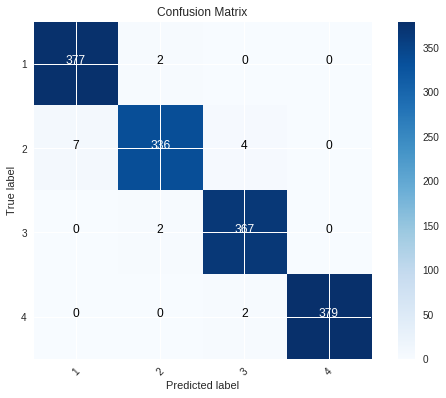

In [0]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


y_pred = model.predict(X_test).ravel()

y_true_labels = np.argmax(y_test, axis=1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true_labels, y_pred_labels)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[1, 2, 3, 4],
                      title='Confusion Matrix')

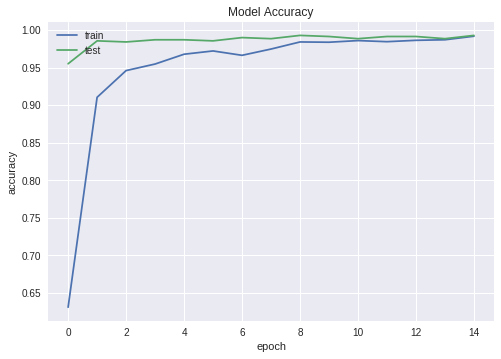

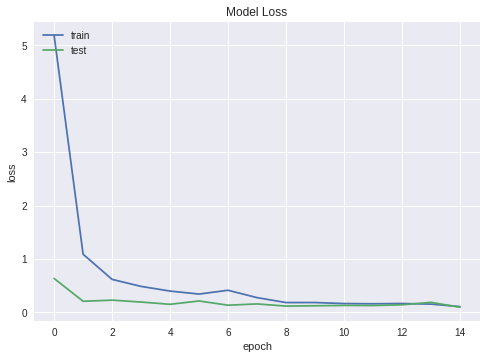

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()